In [19]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

In [35]:
def buildAndTrainTheModel(x,y):
    ANNreg = nn.Sequential(
    nn.Linear(1,1), #input layer
    nn.ReLU(),     #activation function
    nn.Linear(1,1) #output layer
    )


    #loss function
    lossfun = nn.MSELoss()

    #optimizer (the flavor of gradient descent to implent)
    optimizer = torch.optim.SGD(ANNreg.parameters(),lr=.05)
    
    #train the model
    numepochs = 500
    losses = torch.zeros(numepochs)

    #Train the model
    for epochi in range(numepochs):
    #forward pass
        yHat = ANNreg(x)
    
    #compute loss
        loss=lossfun(yHat,y)
        losses[epochi]=loss
    
    #backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    #end training loop
    #final forward pass
    predictions = ANNreg(x)

#     #final loss(MSE)
#     testloss = (predictions-y).pow(2).mean()
        
    return predictions, losses

In [36]:
def CreateTheData(m):
    #create data
    N=50
    x = torch.randn(N,1)
    y = m*x+torch.randn(N,1)/2
    return x,y

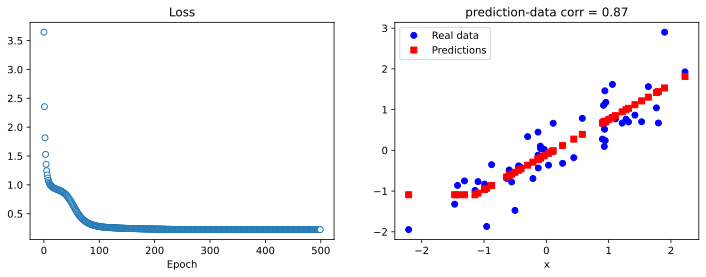

In [37]:
#create a dataset
x,y = CreateTheData(.8)
# run the model
yHat,losses = buildAndTrainTheModel(x,y)

fig,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss')

ax[1].plot(x,y,'bo',label='Real data')
ax[1].plot(x,yHat.detach(),'rs',label='Predictions')
ax[1].set_xlabel('x')
ax[1].set_title(f'prediction-data corr = {np.corrcoef(y.T,yHat.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()

In [42]:
#the slopes to simulate
slopes = np.linspace(-2,2,21)
numExps = 50 
#initialize output matrix
results = np.zeros((len(slopes),numExps,2))

for slopei in range(len(slopes)):
    for N in range(numExps):
        #create a dataset and run the model
        x,y = CreateTheData(slopes[slopei])
        yHat,losses = buildAndTrainTheModel(x,y)
        
        #store the final loss and performance
        results[slopei,N,0] = losses[-1]
        results[slopei,N,1] = np.corrcoef(y.T,yHat.detach().T)[0,1]
        
#correlation can be 0 if the model didn't do well. Set man's->0
results[np.isnan(results)] = 0

/Users/vadimsmirnov/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/vadimsmirnov/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Text(0.5, 1.0, 'Model performance')

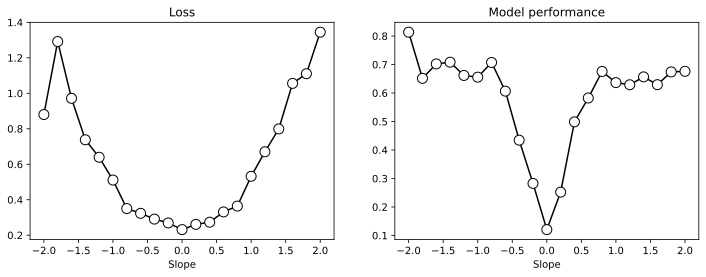

In [43]:
#plot the results!
fig,ax=plt.subplots(1,2,figsize=(12,4))

ax[0].plot(slopes,np.mean(results[:,:,0],axis=1),'ko-',markerfacecolor='w',markersize=10)
ax[0].set_xlabel('Slope')
ax[0].set_title('Loss')

ax[1].plot(slopes,np.mean(results[:,:,1],axis=1),'ko-',markerfacecolor='w',markersize=10)
ax[1].set_xlabel('Slope')
ax[1].set_title('Loss')
ax[1].set_title('Model performance')